In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
df = pd.read_excel("huge_output.xlsx",sheet_name="Simulated Data")

In [132]:
categorical_variables = [c for c in list(df.columns)[list(df.columns).index('severity_over_sales')+1:] if c not in ['user_ratings_total','restaurant','Slip_Flag']]
categorical_variables

['price_level',
 'rating',
 'reservable',
 'serves_beer',
 'serves_wine',
 'serves_wine_or_beer',
 'cafe',
 'lodging',
 'bakery',
 'night_club',
 'bar',
 'meal_delivery',
 'store',
 'meal_takeaway',
 'Unclean_Flag',
 'Food_Safety_Flag',
 'Crime_Flag',
 'Flags']

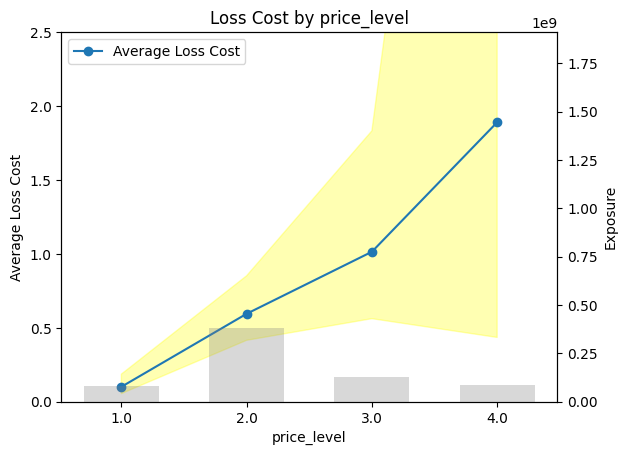

C:\Users\micha\AppData\Local\Temp\ipykernel_25844\3044530060.py:17: RuntimeWarning: divide by zero encountered in log
  line_1_lower = np.exp(np.log(line_1) - 1.96 * sigma_1/(line_1*np.sqrt(counts)))
C:\Users\micha\AppData\Local\Temp\ipykernel_25844\3044530060.py:17: RuntimeWarning: invalid value encountered in divide
  line_1_lower = np.exp(np.log(line_1) - 1.96 * sigma_1/(line_1*np.sqrt(counts)))
C:\Users\micha\AppData\Local\Temp\ipykernel_25844\3044530060.py:18: RuntimeWarning: divide by zero encountered in log
  line_1_upper = np.exp(np.log(line_1) + 1.96 * sigma_1/(line_1*np.sqrt(counts)))
C:\Users\micha\AppData\Local\Temp\ipykernel_25844\3044530060.py:18: RuntimeWarning: invalid value encountered in divide
  line_1_upper = np.exp(np.log(line_1) + 1.96 * sigma_1/(line_1*np.sqrt(counts)))


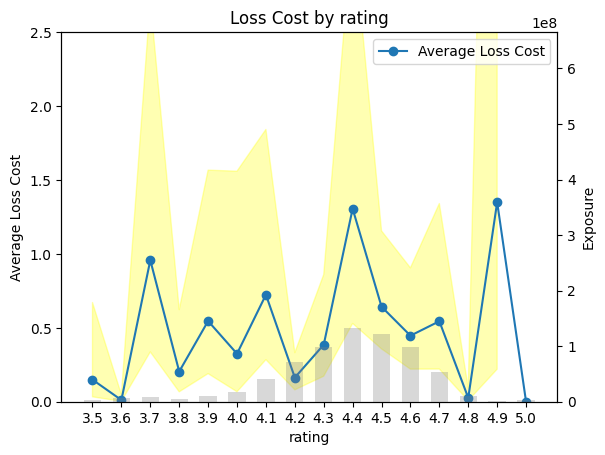

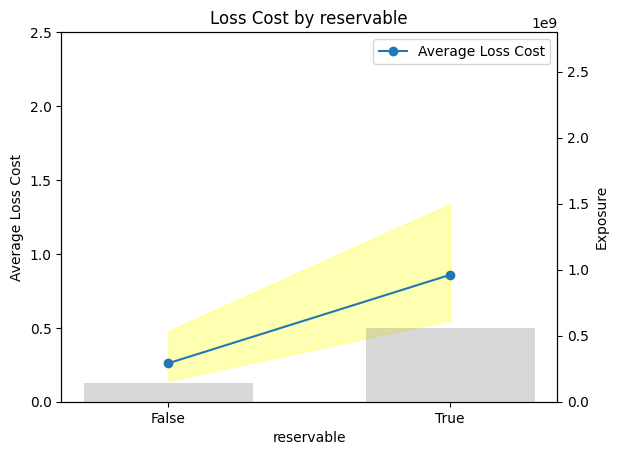

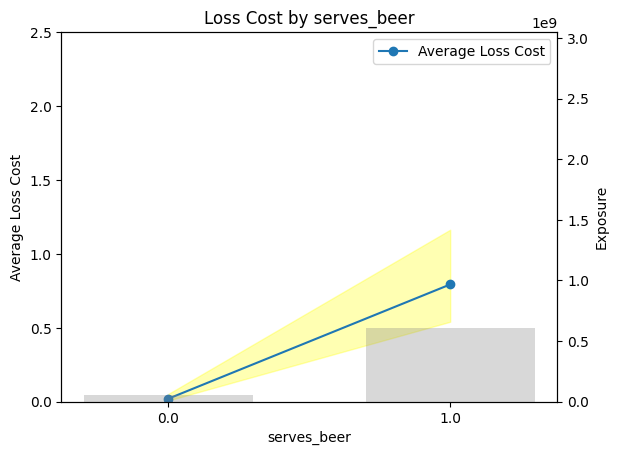

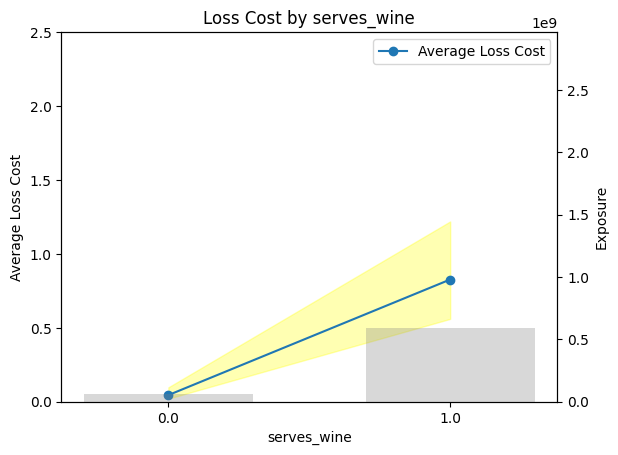

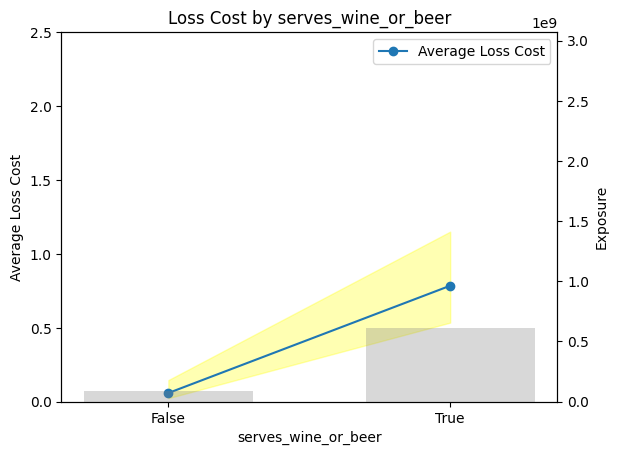

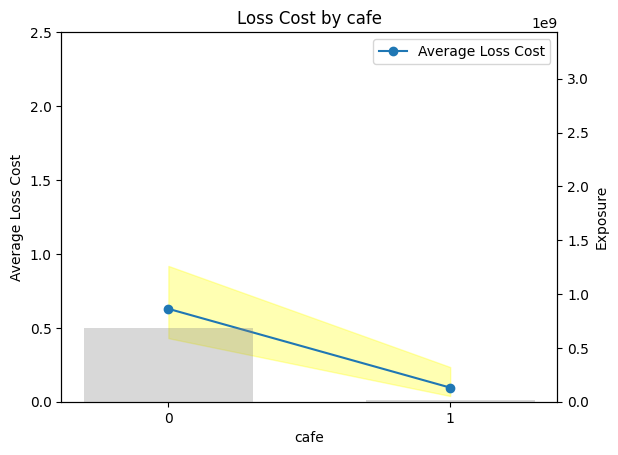

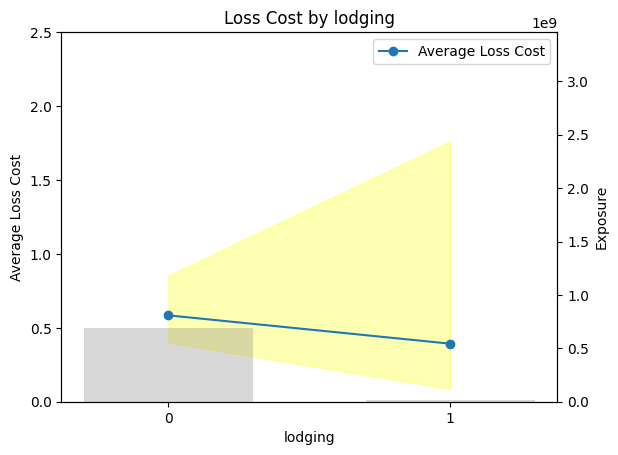

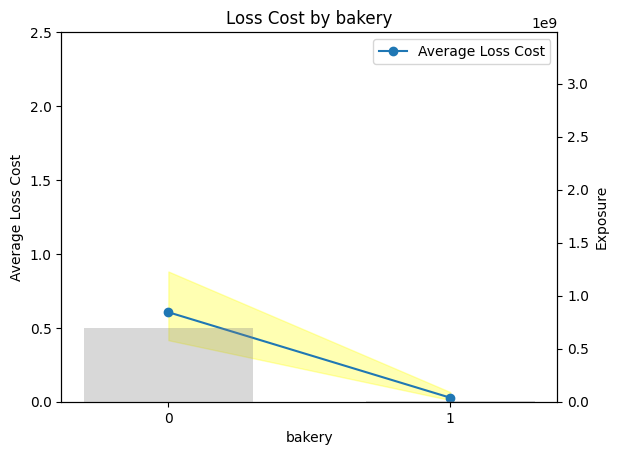

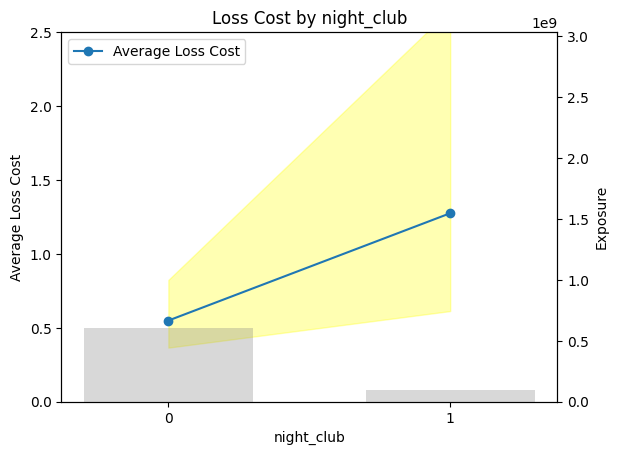

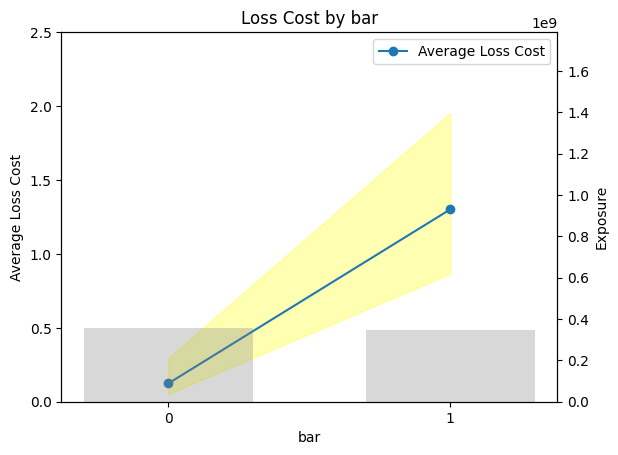

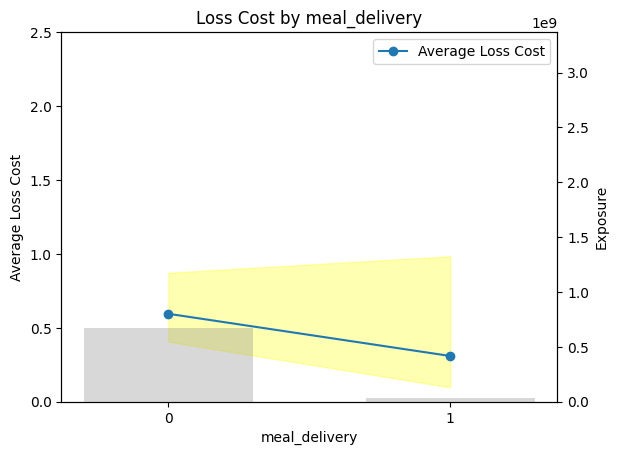

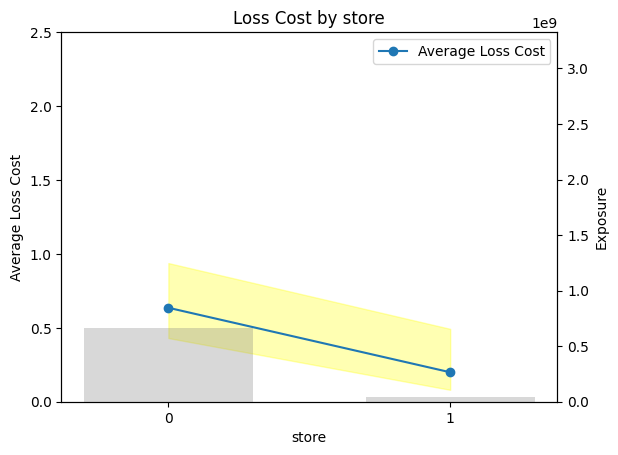

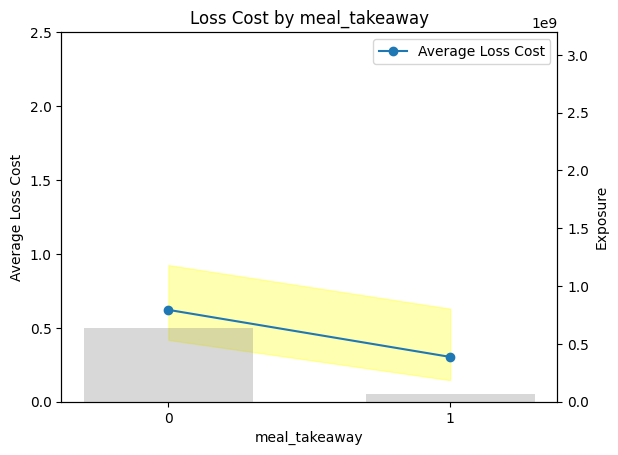

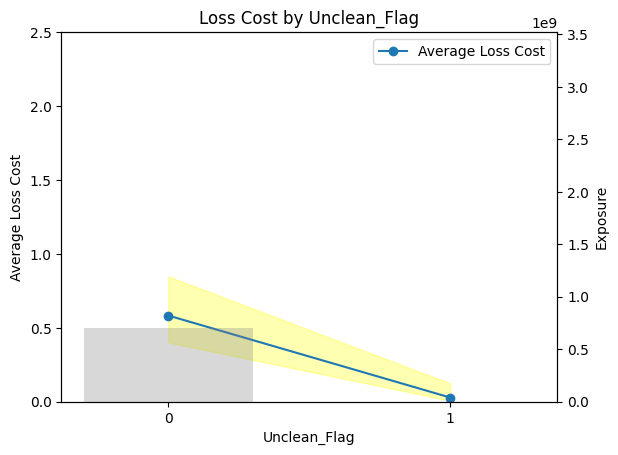

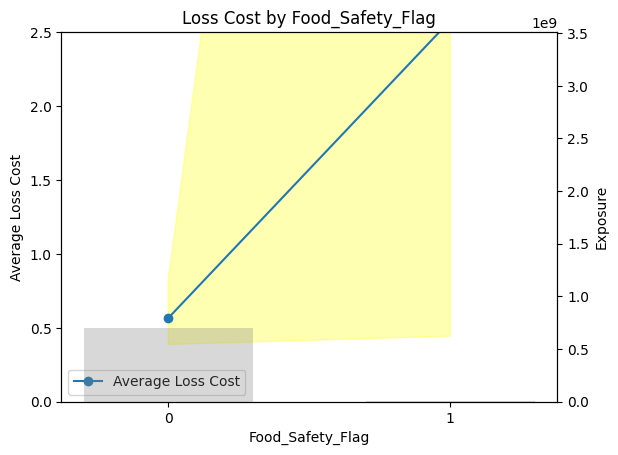

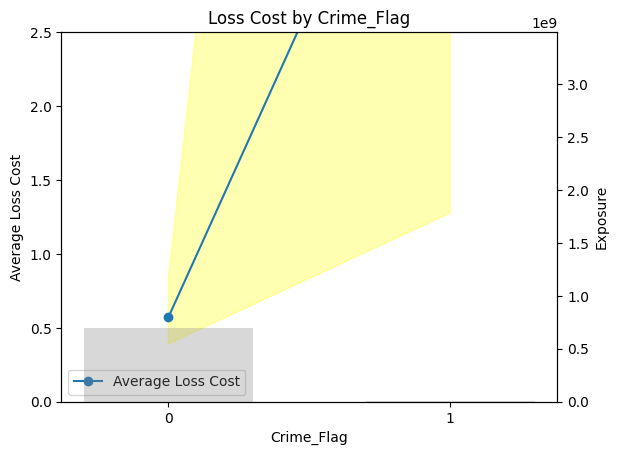

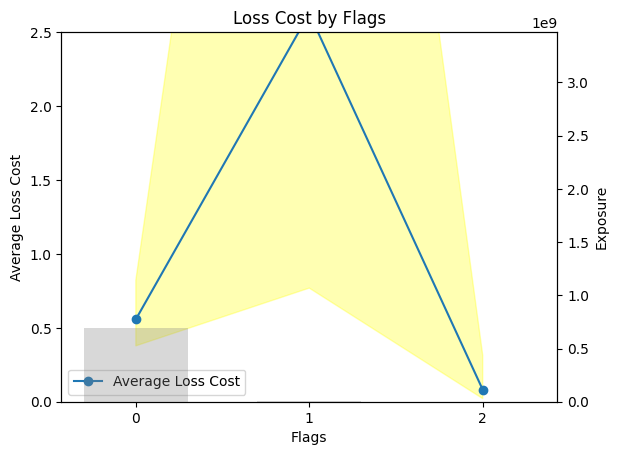

In [133]:
# Buckets (categorical)
for variable in categorical_variables:
    data = df.copy()
    if(variable=='rating'):
        data = data.loc[data['rating']>=3.5].reset_index(drop=True)
    buckets = sorted(set(list(data[variable].dropna())))
    x = np.arange(len(buckets))
    
    # Two modeled lines
    line_1 = np.asarray(data[[variable,'simulated_losses_over_sales']].groupby(variable).mean()).reshape((len(buckets),))
    
    # Made-up sigma values (more volatile)
    sigma_1 = np.array([np.std(data.loc[data[variable]==c,'simulated_losses_over_sales']) for c in buckets])
    counts = np.array([len(data.loc[data[variable]==c,'simulated_losses_over_sales']) for c in buckets])
    
    # 95% confidence intervals using 1.96 * sigma
    line_1_lower = np.exp(np.log(line_1) - 1.96 * sigma_1/(line_1*np.sqrt(counts)))
    line_1_upper = np.exp(np.log(line_1) + 1.96 * sigma_1/(line_1*np.sqrt(counts)))
    
    # Exposure amounts for each bucket
    exposure = [(data.loc[data[variable]==c,'sales'].sum()) for c in buckets]
    
    # Create the plot
    fig, ax1 = plt.subplots()
    
    # Plot lines on left y-axis
    ax1.plot(x, line_1, label="Average Loss Cost",marker='o')
    
    # Confidence interval clouds
    ax1.fill_between(x, line_1_lower, line_1_upper, alpha=0.3, color='yellow')
    
    ax1.set_xlabel(variable)
    ax1.set_ylabel("Average Loss Cost")
    ax1.set_xticks(x)
    ax1.set_xticklabels(buckets)
    
    # Create right y-axis for exposure
    ax2 = ax1.twinx()
    
    # Set maximum and minimum for the y axes
    ax1.set_ylim(0, 2.5)
    ax2.set_ylim(0, 5*max(exposure))
    
    # Bar plot for exposure on right y-axis
    ax2.bar(x, exposure, alpha=0.3, width=0.6, label="Exposure", color='gray')
    ax2.set_ylabel("Exposure")
    
    # Combine legends from both axes
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    ax1.legend(lines_1, labels_1)
    
    plt.title("Loss Cost by "+variable)
    plt.show()

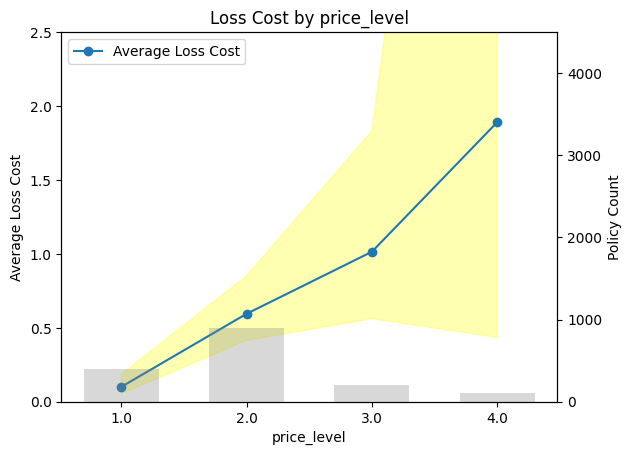

C:\Users\micha\AppData\Local\Temp\ipykernel_25844\1416308168.py:17: RuntimeWarning: divide by zero encountered in log
  line_1_lower = np.exp(np.log(line_1) - 1.96 * sigma_1/(line_1*np.sqrt(counts)))
C:\Users\micha\AppData\Local\Temp\ipykernel_25844\1416308168.py:17: RuntimeWarning: invalid value encountered in divide
  line_1_lower = np.exp(np.log(line_1) - 1.96 * sigma_1/(line_1*np.sqrt(counts)))
C:\Users\micha\AppData\Local\Temp\ipykernel_25844\1416308168.py:18: RuntimeWarning: divide by zero encountered in log
  line_1_upper = np.exp(np.log(line_1) + 1.96 * sigma_1/(line_1*np.sqrt(counts)))
C:\Users\micha\AppData\Local\Temp\ipykernel_25844\1416308168.py:18: RuntimeWarning: invalid value encountered in divide
  line_1_upper = np.exp(np.log(line_1) + 1.96 * sigma_1/(line_1*np.sqrt(counts)))


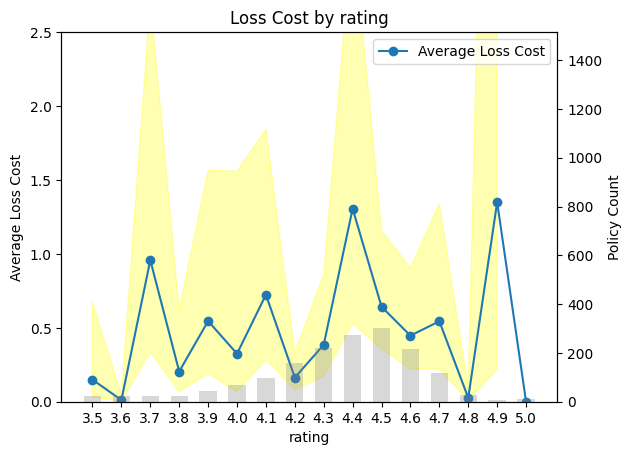

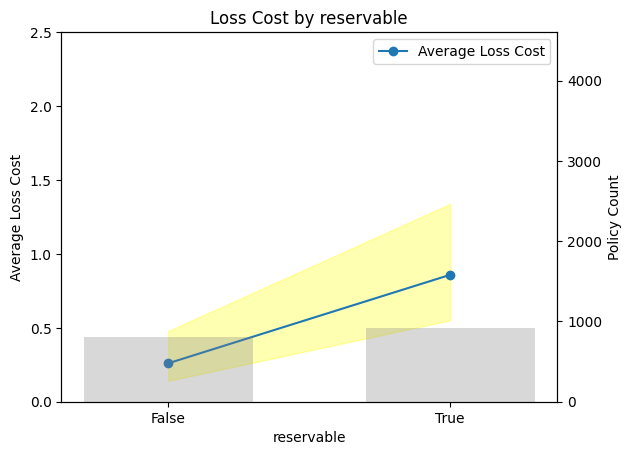

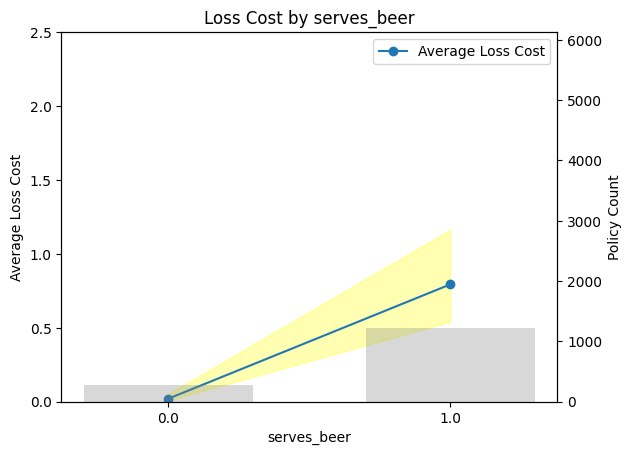

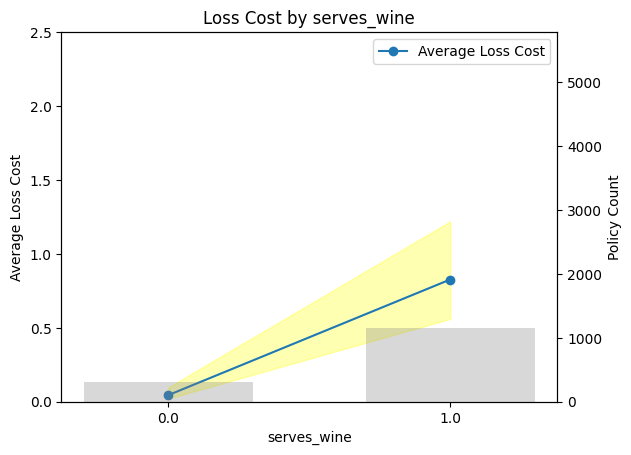

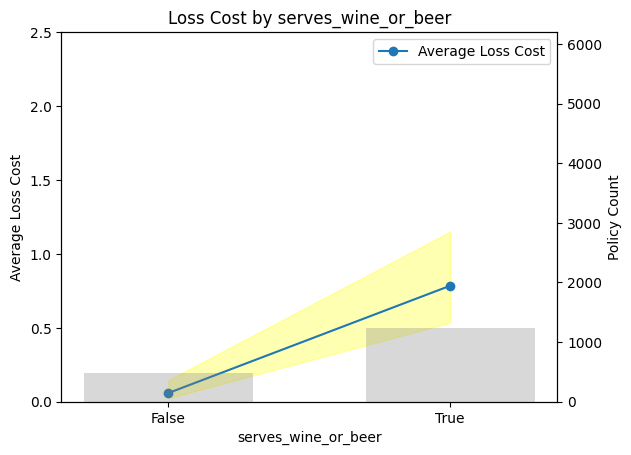

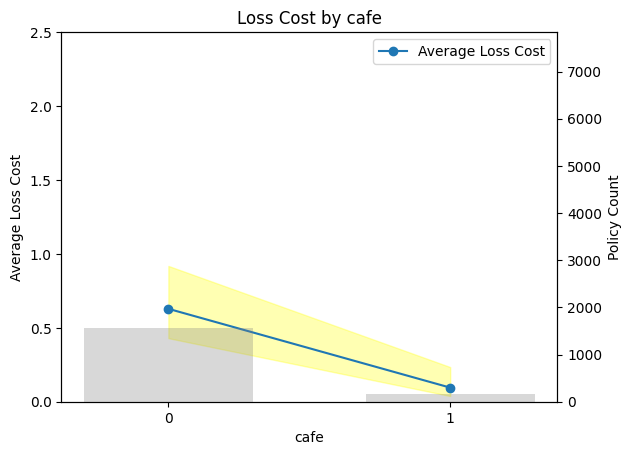

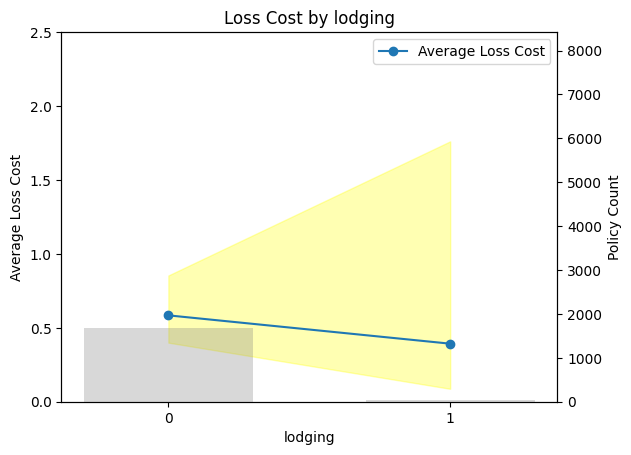

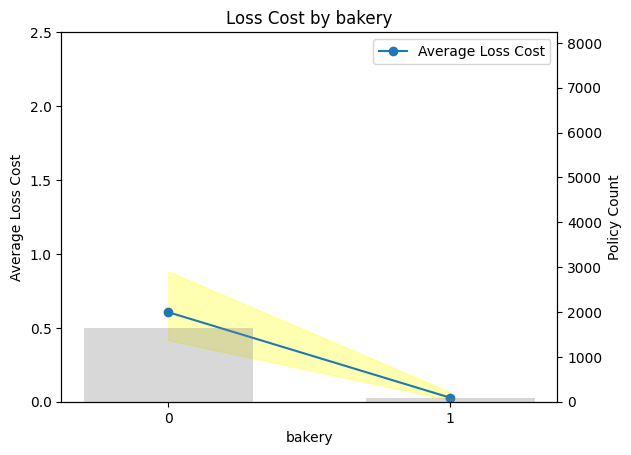

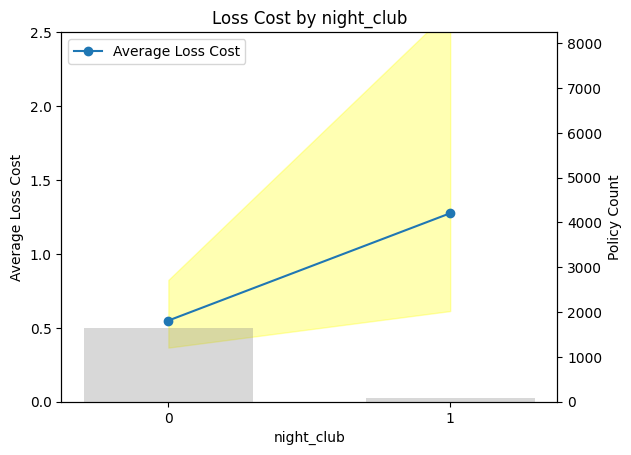

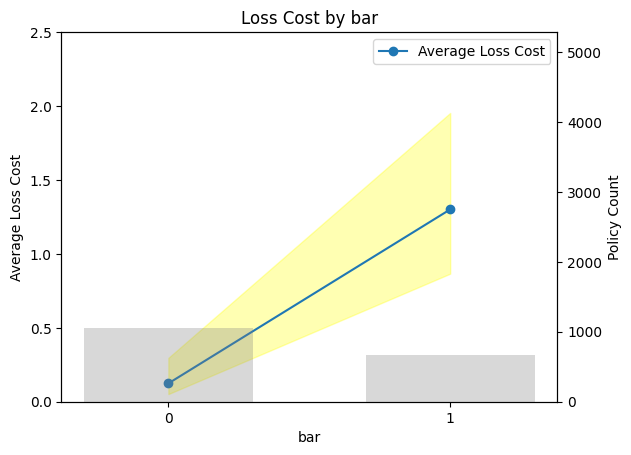

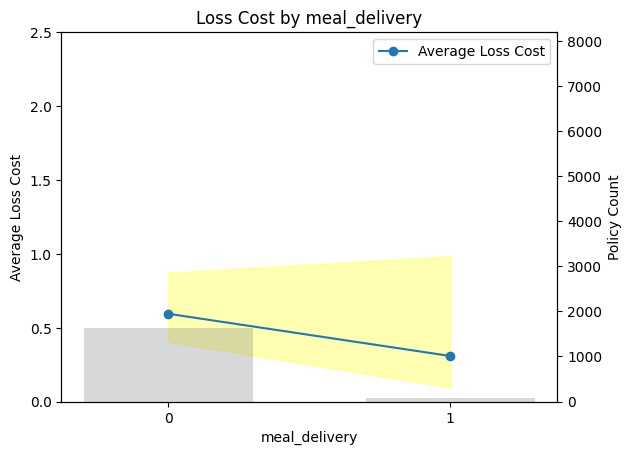

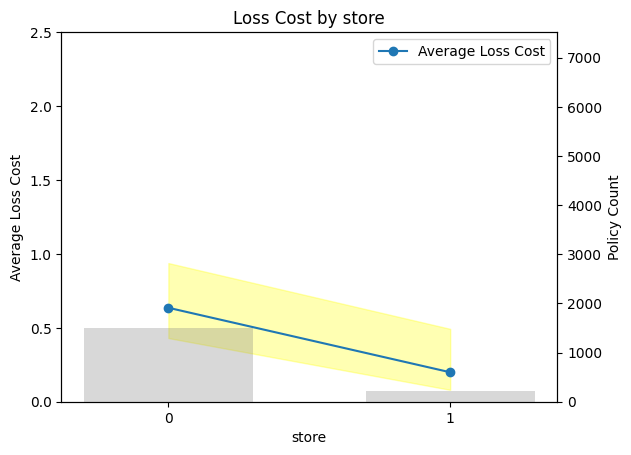

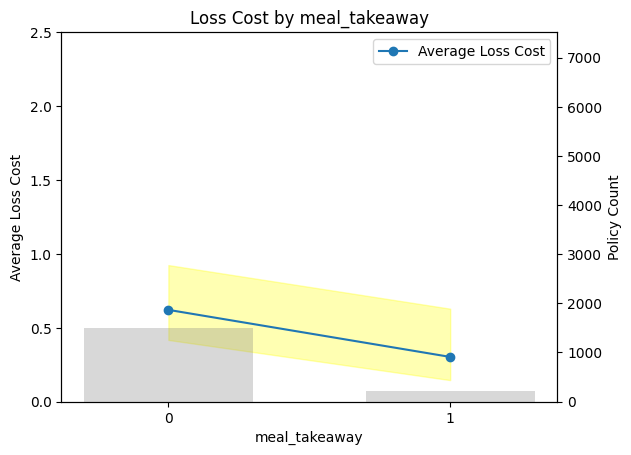

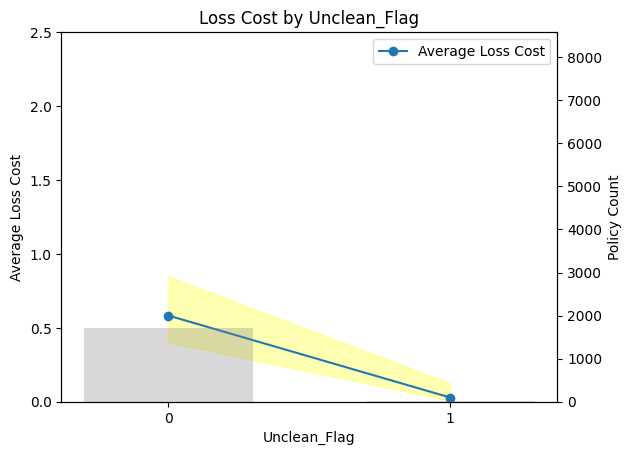

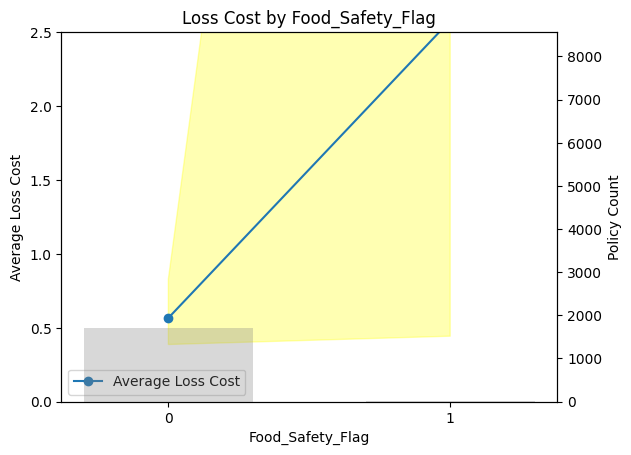

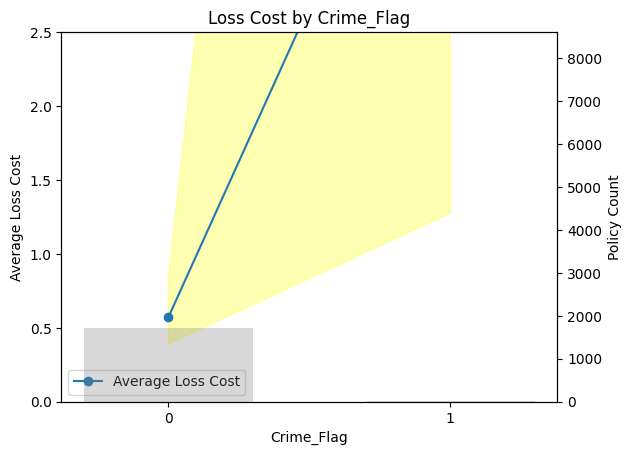

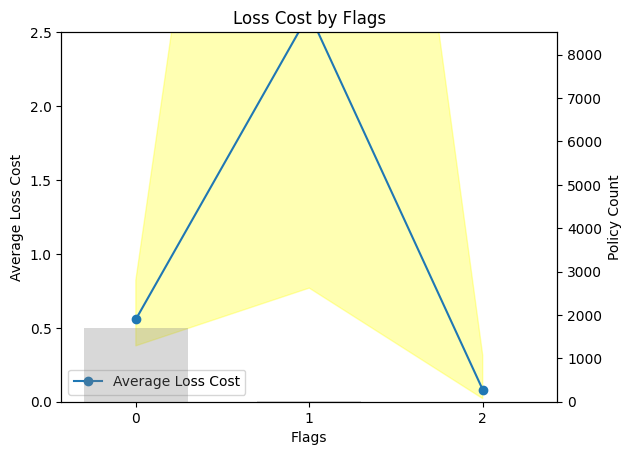

In [134]:
# Buckets (categorical)
for variable in categorical_variables:
    data = df.copy()
    if(variable=='rating'):
        data = data.loc[data['rating']>=3.5].reset_index(drop=True)
    buckets = sorted(set(list(data[variable].dropna())))
    x = np.arange(len(buckets))
    
    # Two modeled lines
    line_1 = np.asarray(data[[variable,'simulated_losses_over_sales']].groupby(variable).mean()).reshape((len(buckets),))
    
    # Made-up sigma values (more volatile)
    sigma_1 = np.array([np.std(data.loc[data[variable]==c,'simulated_losses_over_sales']) for c in buckets])
    counts = np.array([len(data.loc[data[variable]==c,'simulated_losses_over_sales']) for c in buckets])
    
    # 95% confidence intervals using 1.96 * sigma
    line_1_lower = np.exp(np.log(line_1) - 1.96 * sigma_1/(line_1*np.sqrt(counts)))
    line_1_upper = np.exp(np.log(line_1) + 1.96 * sigma_1/(line_1*np.sqrt(counts)))
    
    # Exposure amounts for each bucket
    exposure = [len(data.loc[data[variable]==c]) for c in buckets]
    
    # Create the plot
    fig, ax1 = plt.subplots()
    
    # Plot lines on left y-axis
    ax1.plot(x, line_1, label="Average Loss Cost",marker='o')
    
    # Confidence interval clouds
    ax1.fill_between(x, line_1_lower, line_1_upper, alpha=0.3, color='yellow')
    
    ax1.set_xlabel(variable)
    ax1.set_ylabel("Average Loss Cost")
    ax1.set_xticks(x)
    ax1.set_xticklabels(buckets)
    
    # Create right y-axis for exposure
    ax2 = ax1.twinx()
    
    # Set maximum and minimum for the y axes
    ax1.set_ylim(0, 2.5)
    ax2.set_ylim(0, 5*max(exposure))
    
    # Bar plot for exposure on right y-axis
    ax2.bar(x, exposure, alpha=0.3, width=0.6, label="Policy Count", color='gray')
    ax2.set_ylabel("Policy Count")
    
    # Combine legends from both axes
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    ax1.legend(lines_1, labels_1)
    
    plt.title("Loss Cost by "+variable)
    plt.show()

In [135]:
df.columns

Index(['index', 'rand value exposure', 'rand value freq', 'rand value sev',
       'simulated_loss', 'Freq Points', 'Chance of claim', 'Claim', 'Severity',
       'Severity mu', 'Severity Sigma', 'Expected Severity', '5th Percentile',
       '95th Percentile', 'sales', 'simulated_losses_over_sales',
       'severity_over_sales', 'price_level', 'rating', 'reservable',
       'serves_beer', 'serves_wine', 'serves_wine_or_beer',
       'user_ratings_total', 'restaurant', 'cafe', 'lodging', 'bakery',
       'night_club', 'bar', 'meal_delivery', 'store', 'meal_takeaway',
       'Unclean_Flag', 'Food_Safety_Flag', 'Crime_Flag', 'Slip_Flag', 'Flags'],
      dtype='object')

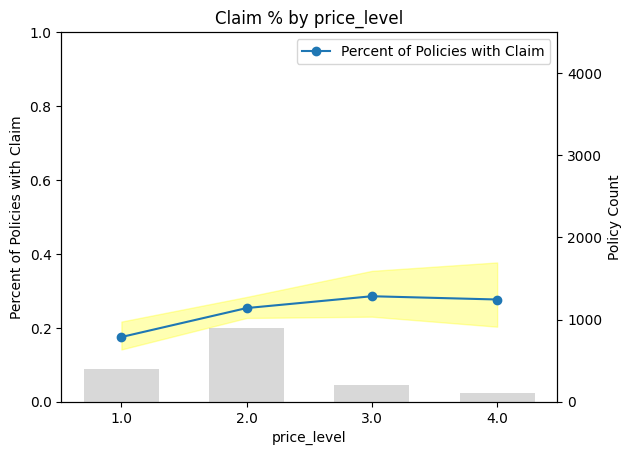

C:\Users\micha\AppData\Local\Temp\ipykernel_25844\194523634.py:17: RuntimeWarning: divide by zero encountered in log
  line_1_lower = np.exp(np.log(line_1) - 1.96 * sigma_1/(line_1*np.sqrt(counts)))
C:\Users\micha\AppData\Local\Temp\ipykernel_25844\194523634.py:17: RuntimeWarning: invalid value encountered in divide
  line_1_lower = np.exp(np.log(line_1) - 1.96 * sigma_1/(line_1*np.sqrt(counts)))
C:\Users\micha\AppData\Local\Temp\ipykernel_25844\194523634.py:18: RuntimeWarning: divide by zero encountered in log
  line_1_upper = np.exp(np.log(line_1) + 1.96 * sigma_1/(line_1*np.sqrt(counts)))
C:\Users\micha\AppData\Local\Temp\ipykernel_25844\194523634.py:18: RuntimeWarning: invalid value encountered in divide
  line_1_upper = np.exp(np.log(line_1) + 1.96 * sigma_1/(line_1*np.sqrt(counts)))


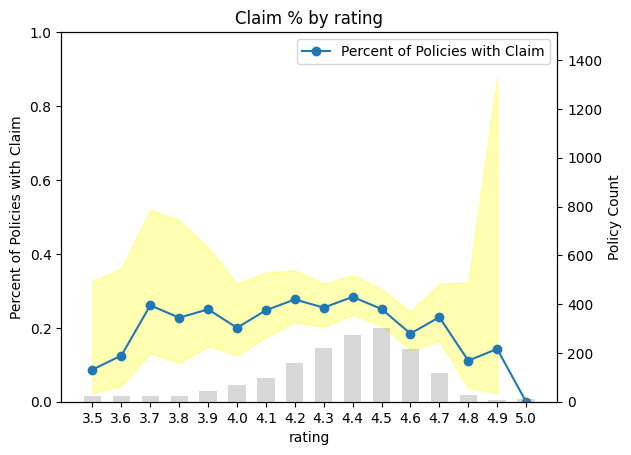

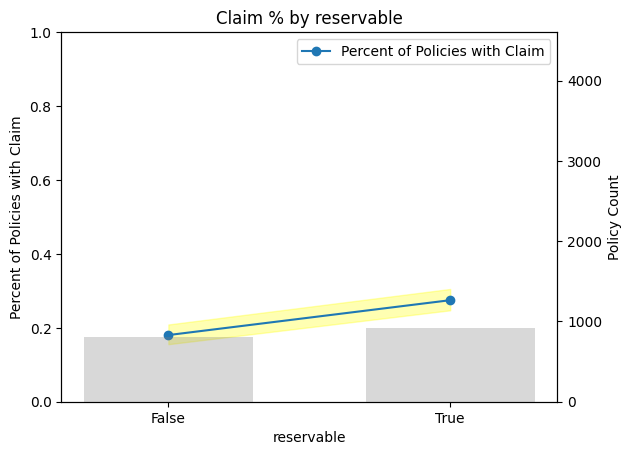

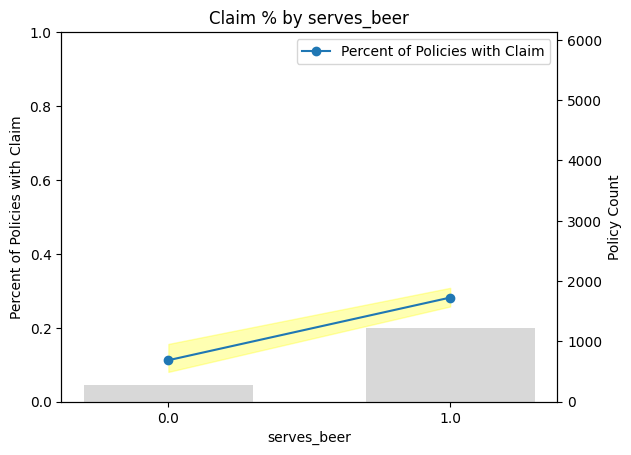

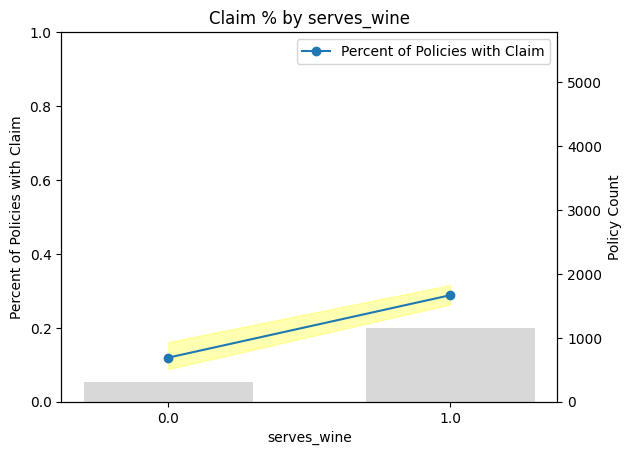

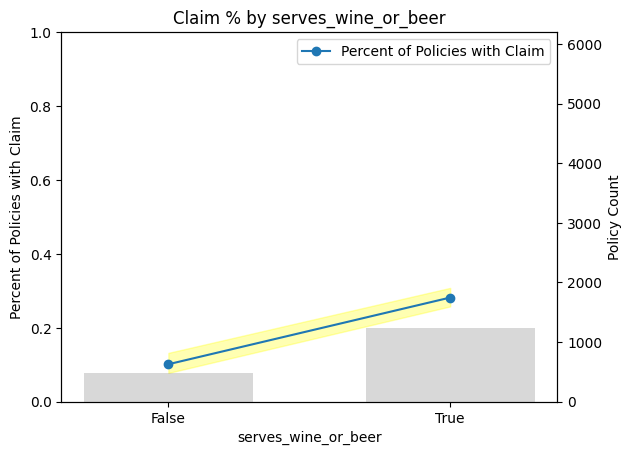

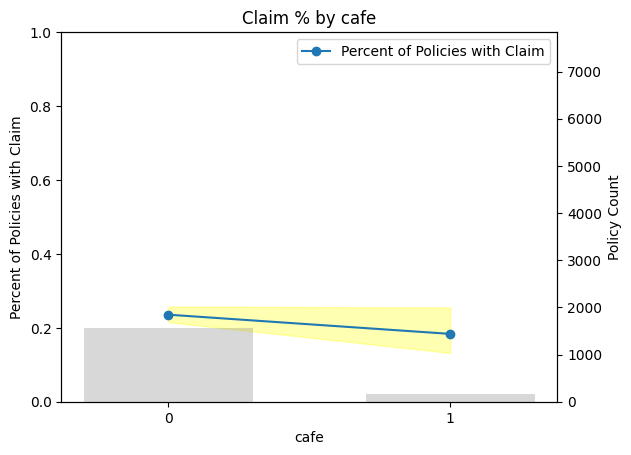

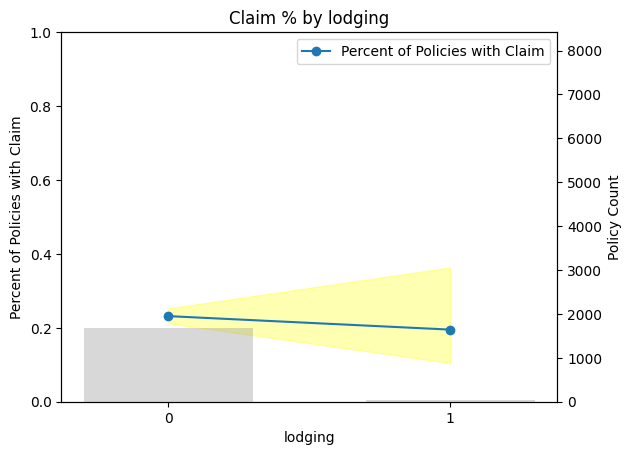

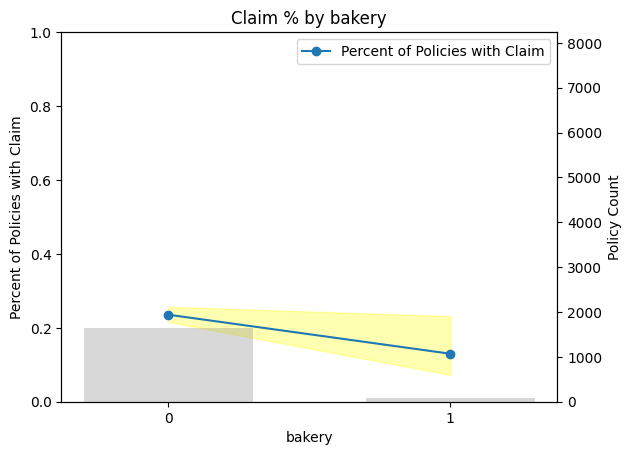

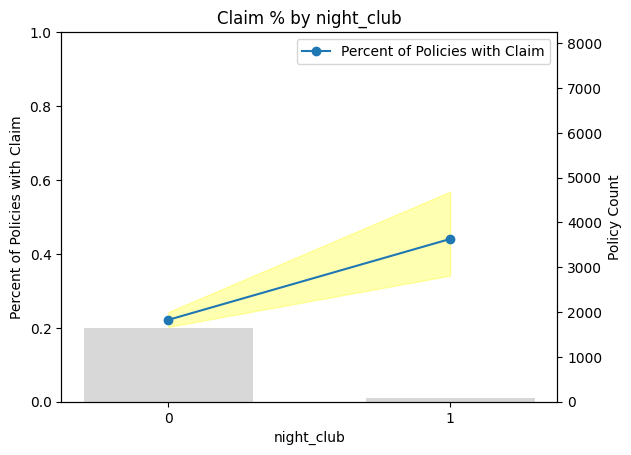

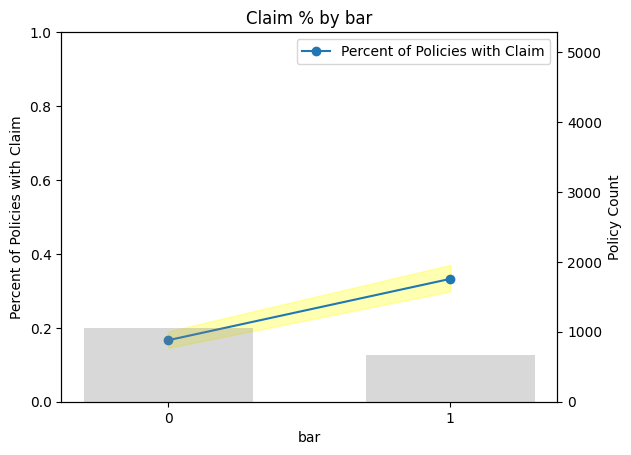

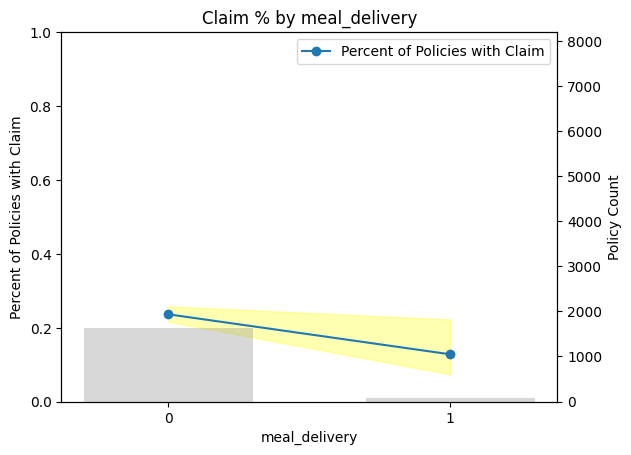

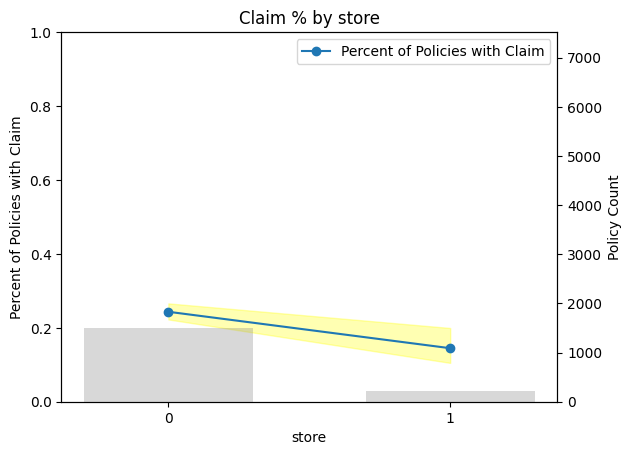

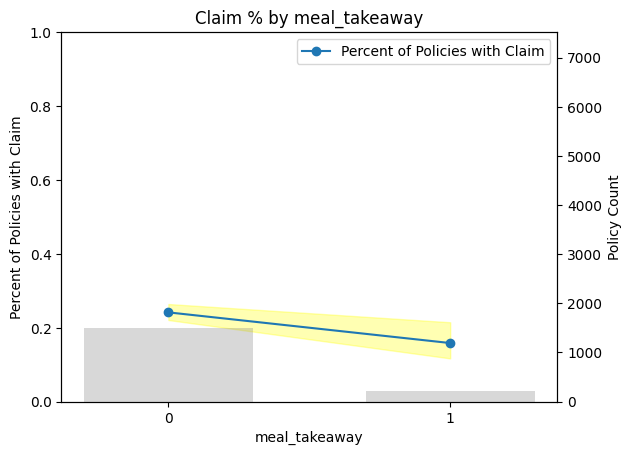

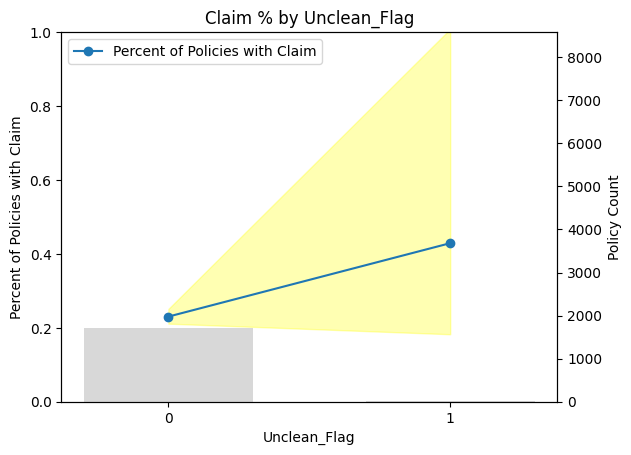

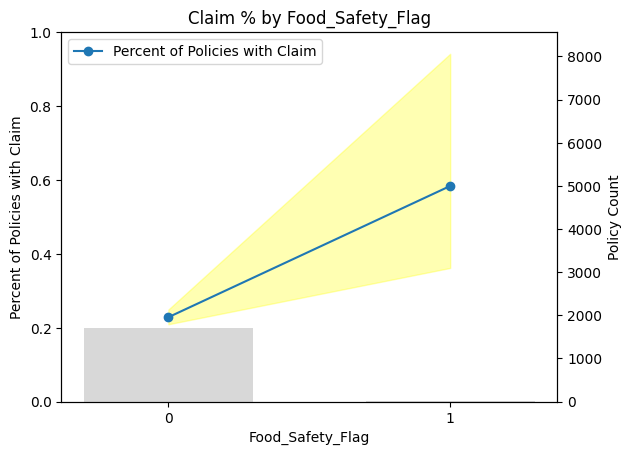

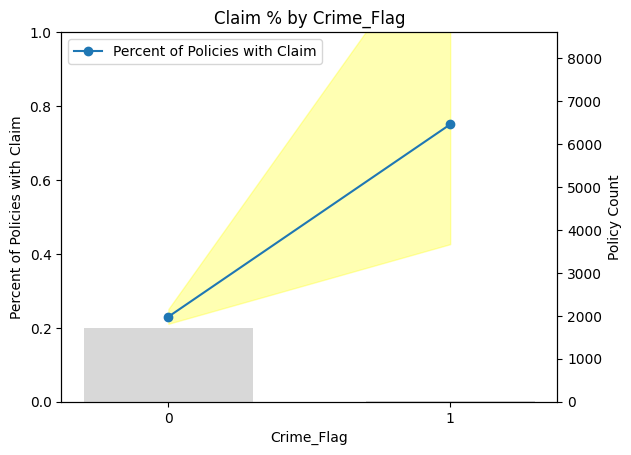

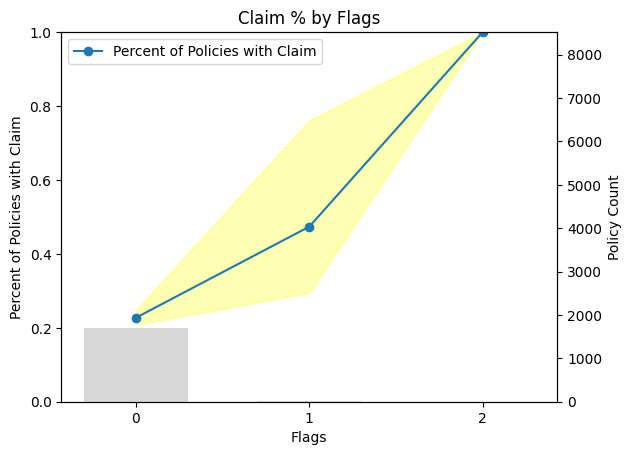

In [137]:
# Buckets (categorical)
for variable in categorical_variables:
    data = df.copy()
    if(variable=='rating'):
        data = data.loc[data['rating']>=3.5].reset_index(drop=True)
    buckets = sorted(set(list(data[variable].dropna())))
    x = np.arange(len(buckets))
    
    # Two modeled lines
    line_1 = np.asarray(data[[variable,'Claim']].groupby(variable).mean()).reshape((len(buckets),))
    
    # Made-up sigma values (more volatile)
    sigma_1 = np.array([np.std(data.loc[data[variable]==c,'Claim']) for c in buckets])
    counts = np.array([len(data.loc[data[variable]==c,'Claim']) for c in buckets])
    
    # 95% confidence intervals using 1.96 * sigma
    line_1_lower = np.exp(np.log(line_1) - 1.96 * sigma_1/(line_1*np.sqrt(counts)))
    line_1_upper = np.exp(np.log(line_1) + 1.96 * sigma_1/(line_1*np.sqrt(counts)))
    
    # Exposure amounts for each bucket
    exposure = [len(data.loc[data[variable]==c]) for c in buckets]
    
    # Create the plot
    fig, ax1 = plt.subplots()
    
    # Plot lines on left y-axis
    ax1.plot(x, line_1, label="Percent of Policies with Claim",marker='o')
    
    # Confidence interval clouds
    ax1.fill_between(x, line_1_lower, line_1_upper, alpha=0.3, color='yellow')
    
    ax1.set_xlabel(variable)
    ax1.set_ylabel("Percent of Policies with Claim")
    ax1.set_xticks(x)
    ax1.set_xticklabels(buckets)
    
    # Create right y-axis for exposure
    ax2 = ax1.twinx()
    
    # Set maximum and minimum for the y axes
    ax1.set_ylim(0, 1)
    ax2.set_ylim(0, 5*max(exposure))
    
    # Bar plot for exposure on right y-axis
    ax2.bar(x, exposure, alpha=0.3, width=0.6, label="Policy Count", color='gray')
    ax2.set_ylabel("Policy Count")
    
    # Combine legends from both axes
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    ax1.legend(lines_1, labels_1)
    
    plt.title("Claim % by "+variable)
    plt.show()